# Case2 Machine learning and stock selection

### Two consideratons:


#### 1 How to select stocks using machine learning?


#### 2. How to evaluate the performance of this selection strategy?

# Outline
## 1. Data preprocessing
## 2. Build the SVM model
## 3. Select stock every year and calculate the cumulative return

In [1]:
import pandas as pd
import numpy as np

## 1. Data preprocessing

### 1.1 financial indicators

![frame1](table1.png)

In [2]:
findata = pd.read_csv('annualReport.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
findata.head()

,Unnamed: 0,CO_ID,CoName,YYYY/MM,Quarter,consolidation,Month,ROA(B)-EBITDA%_Consol,ROE(B)-NI ExDisposal_Consol,Net Sales_Consol,...,Total Current Assets_Consol,Total Current Liab._Consol,Inventories_Consol,Inventory Turnover_Consol,YOY%-Oper.Income_Consol,YOY%-Net Income_Consol,A/R & N/R Turnover_Consol,P/E_Consol,P/B_Consol,PSR_Consol
0,0,000116,Jih Sun Securities,2000/12,4,N,12,7.80,11.68,8326205,...,27751447,13850446,nan,nan,1.43,-21.22,12.56,6.62,0.73,1.65
1,1,000930,Hua Nan Sec.,2000/12,4,N,12,0.61,-7.90,2845729,...,10582023,8088532,nan,nan,-90.92,-206.51,180.43,nan,1.01,2.38
2,2,000960,Fubon Securities,2000/12,4,N,12,5.52,6.32,8561607,...,42628400,21287389,nan,nan,-23.89,3.28,11.34,15.05,0.76,2.81
3,3,0009A0,SinoPac Securities,2000/12,4,N,12,6.58,8.71,5844250,...,27691589,15926358,nan,nan,21.15,-3.60,170.93,7.67,0.60,1.88
4,4,1101,Taiwan Cement,2000/12,4,Y,12,1.79,-2.80,28381485,...,16474847,18353243,1958077,13.42,-24.54,-48.95,6.71,nan,0.77,1.28


In [4]:
findata.columns

Index(['Unnamed: 0', 'CO_ID', 'CoName', 'YYYY/MM', 'Quarter', 'consolidation',
       'Month', 'ROA(B)-EBITDA%_Consol', 'ROE(B)-NI ExDisposal_Consol',
       'Net Sales_Consol', 'Operating Income_Consol', 'Net Income_Consol',
       'Income Tax Expense_Consol', 'Total Liabilities_Consol',
       'Total Equity_Consol', 'Total Current Assets_Consol',
       'Total Current Liab._Consol', 'Inventories_Consol',
       'Inventory Turnover_Consol', 'YOY%-Oper.Income_Consol',
       'YOY%-Net Income_Consol', 'A/R & N/R Turnover_Consol', 'P/E_Consol',
       'P/B_Consol', 'PSR_Consol'],
      dtype='object')

In [5]:
findata = findata.loc[findata.consolidation=='Y']

In [6]:
findata.index = pd.to_datetime(findata['YYYY/MM'])

In [7]:
findata['year'] = findata.index.year

In [8]:
findata.iloc[:,7:] = findata.iloc[:,7:].astype(np.float)

In [9]:
findata2 = findata[['CO_ID','year','P/E_Consol','P/B_Consol', 'PSR_Consol', 
                    'ROA(B)-EBITDA%_Consol', 'ROE(B)-NI ExDisposal_Consol',
                      'Inventory Turnover_Consol', 'YOY%-Oper.Income_Consol',
       'YOY%-Net Income_Consol', 'A/R & N/R Turnover_Consol']]

In [10]:
findata2.loc[:,'OPM']=findata.loc[:,'Operating Income_Consol']/findata.loc[:,'Net Sales_Consol']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
findata2.loc[:,'NPM']=findata.loc[:,'Net Income_Consol']/findata.loc[:,'Net Sales_Consol']

In [12]:
findata2.loc[:,'DER']=findata.loc[:,'Total Liabilities_Consol']/findata.loc[:,'Total Equity_Consol']

In [13]:
findata2.loc[:,'CR']=findata.loc[:,'Total Current Assets_Consol']/findata.loc[:,'Total Current Liab._Consol']

In [14]:
findata2.loc[:,'QR']=(findata.loc[:,'Total Current Assets_Consol']-findata.loc[:,'Inventories_Consol'])/findata.loc[:,'Total Current Liab._Consol']

In [15]:
findata2.shape

(28082, 16)

In [16]:
findata2.groupby('year').size()

year
2000.0     681
2001.0     783
2002.0     906
2003.0    1001
2004.0    1041
2005.0    1402
2006.0    1431
2007.0    1469
2008.0    1515
2009.0    1555
2010.0    1639
2011.0    1699
2012.0    1751
2013.0    1816
2014.0    1889
2015.0    1915
2016.0    1889
2017.0    1872
2018.0    1828
dtype: int64

### 1.2 Stock  return

In [17]:
ret = pd.read_csv('monret_00_19.csv',sep=';')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
ret.head()

,CO_ID,CoName,Date,ROI_Month,Close_Month
0,000116,Jih Sun Securities,2000/01,34.1774,30.78
1,000930,Hua Nan Sec.,2000/01,71.9151,17.41
2,000960,Fubon Securities,2000/01,61.3257,25.85
3,0009A0,SinoPac Securities,2000/01,70.7316,17.29
4,1101,Taiwan Cement,2000/01,18.2095,11.13


In [19]:
ret.index = pd.to_datetime(ret.Date)

In [20]:
ret.CO_ID = ret.CO_ID.astype(np.str)
ret.ROI_Month 	 = ret.ROI_Month/100

In [21]:
stk_list = np.unique(ret.CO_ID)

In [22]:
stk_list[:7]

array(['000116 ', '000930 ', '000960 ', '0009A0 ', '1101   ', '1102   ',
       '1103   '], dtype=object)

In [23]:
len(stk_list)

2987

In [24]:
stkcd = '3026'

In [25]:
ret_stk = ret.loc[ret.CO_ID==stkcd]

In [26]:
ret_stk.head(10)

,CO_ID,CoName,Date,ROI_Month,Close_Month
Date,,,,,
2000-10-01,3026,Holy Stone,2000/10,-0.177606,36.45
2000-11-01,3026,Holy Stone,2000/11,-0.145541,31.15
2000-12-01,3026,Holy Stone,2000/12,-0.390111,19.00
2001-01-01,3026,Holy Stone,2001/01,1.000001,37.99
2001-02-01,3026,Holy Stone,2001/02,0.004505,38.17
2001-03-01,3026,Holy Stone,2001/03,0.291478,49.29
2001-04-01,3026,Holy Stone,2001/04,-0.204862,39.19
2001-05-01,3026,Holy Stone,2001/05,-0.235808,29.95
2001-06-01,3026,Holy Stone,2001/06,0.130917,35.53


In [27]:
ret_stk = ret_stk.sort_index()

In [28]:
ret_stk['ret'] = ret_stk.ROI_Month.shift(-3)

In [29]:
ret_stk.head(10)

,CO_ID,CoName,Date,ROI_Month,Close_Month,ret
Date,,,,,,
2000-10-01,3026,Holy Stone,2000/10,-0.177606,36.45,1.000001
2000-11-01,3026,Holy Stone,2000/11,-0.145541,31.15,0.004505
2000-12-01,3026,Holy Stone,2000/12,-0.390111,19.00,0.291478
2001-01-01,3026,Holy Stone,2001/01,1.000001,37.99,-0.204862
2001-02-01,3026,Holy Stone,2001/02,0.004505,38.17,-0.235808
2001-03-01,3026,Holy Stone,2001/03,0.291478,49.29,0.130917
2001-04-01,3026,Holy Stone,2001/04,-0.204862,39.19,-0.271845
2001-05-01,3026,Holy Stone,2001/05,-0.235808,29.95,-0.153335
2001-06-01,3026,Holy Stone,2001/06,0.130917,35.53,-0.181104


In [30]:
ret_stk['ret']=(1+ret_stk['ret'])

In [31]:
ret_stk['year'] = ret_stk.index.year

In [32]:
cumret_stk = ret_stk[['ret','year']].groupby('year').cumprod()

In [33]:
cumret_stk['month'] = cumret_stk.index.month

In [34]:
annualRet_stk = cumret_stk.loc[cumret_stk.month==12]

In [35]:
annualRet_stk.ret-=1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [36]:
annualRet_stk.head()

,ret,month
Date,,
2000-12-01,1.594594,12
2001-12-01,-0.426237,12
2002-12-01,-0.445916,12
2003-12-01,0.648166,12
2004-12-01,-0.170718,12


In [37]:
annualRet_stk.loc[:,'CO_ID'] =  stkcd

In [38]:
annualRet_stk.loc[:,'year'] = annualRet_stk.index.year-1

In [39]:
annualRet_stk

,ret,month,CO_ID,year
Date,,,,
2000-12-01,1.594594,12,3026,1999
2001-12-01,-0.426237,12,3026,2000
2002-12-01,-0.445916,12,3026,2001
2003-12-01,0.648166,12,3026,2002
2004-12-01,-0.170718,12,3026,2003
2005-12-01,0.394209,12,3026,2004
2006-12-01,0.136946,12,3026,2005
2007-12-01,-0.216601,12,3026,2006
2008-12-01,-0.442586,12,3026,2007


In [43]:
def getAnnualRet(stkcd,ret=ret):
    ret_stk = ret.loc[ret.CO_ID==stkcd]
    ret_stk = ret_stk.sort_index()
    ret_stk['ret'] = ret_stk.ROI_Month.shift(-3)
    ret_stk['ret']=(1+ret_stk['ret'])
    ret_stk['year'] = ret_stk.index.year
    cumret_stk = ret_stk[['ret','year']].groupby('year').cumprod()
    cumret_stk['month'] = cumret_stk.index.month
    annualRet_stk = cumret_stk.loc[cumret_stk.month==12]
    annualRet_stk['ret']-=1
    annualRet_stk.loc[:,'year'] = annualRet_stk.index.year-1
    annualRet_stk['CO_ID'] =  stkcd   
    return(annualRet_stk)

In [44]:
annualRet_list = []

In [45]:
for stkcd in stk_list:
    anRet_stk = getAnnualRet(stkcd)
    annualRet_list.append(anRet_stk)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [46]:
annualRet_all = pd.concat(annualRet_list)

In [49]:
annualRet_all.tail(10)

,ret,month,year,CO_ID
2014-12-01,-0.051077,12,2013,9962
2015-12-01,-0.269664,12,2014,9962
2016-12-01,0.313506,12,2015,9962
2017-12-01,0.066031,12,2016,9962
2018-12-01,0.187176,12,2017,9962
2006-12-01,0.111110,12,2005,9965
2007-12-01,-0.172939,12,2006,9965
2008-12-01,-0.383858,12,2007,9965
2000-12-01,-0.403611,12,1999,L2301
2001-12-01,0.398459,12,2000,L2301


### 1.3 merge the fin data and stock return data

In [50]:
findata2.head()

,CO_ID,year,P/E_Consol,P/B_Consol,PSR_Consol,ROA(B)-EBITDA%_Consol,ROE(B)-NI ExDisposal_Consol,Inventory Turnover_Consol,YOY%-Oper.Income_Consol,YOY%-Net Income_Consol,A/R & N/R Turnover_Consol,OPM,NPM,DER,CR,QR
YYYY/MM,,,,,,,,,,,,,,,,
2000-12-01,1101,2000.0,NaN,0.77,1.28,1.79,-2.80,13.42,-24.54,-48.95,6.71,0.045857,0.038111,1.929624,0.897653,0.790965
2000-12-01,1102,2000.0,227.88,1.09,3.04,2.62,0.52,6.46,-46.82,-95.09,2.30,0.065025,0.014345,0.661913,0.926320,0.758915
2000-12-01,1103,2000.0,NaN,0.38,0.71,2.14,-3.10,1.60,-4.33,-192.14,2.49,0.116509,-0.063086,2.049299,1.312697,0.990081
2000-12-01,1104,2000.0,103.37,0.49,0.63,3.99,0.67,7.01,-86.81,-77.04,3.25,0.009053,0.013517,0.677758,1.210828,0.965117
2000-12-01,1107,2000.0,NaN,0.15,0.20,-9.05,-29.83,1.24,-2602.29,-345.28,7.65,-0.208292,-0.457641,1.337873,0.883931,0.268951


In [51]:
findata2.year[0]

2000.0

In [52]:
findata2.year = findata2.year.astype(np.int)

In [53]:
XY_data = pd.merge(findata2,annualRet_all,on=['CO_ID','year'])

In [54]:
XY_data = XY_data.dropna()

In [55]:
XY_data.head()

,CO_ID,year,P/E_Consol,P/B_Consol,PSR_Consol,ROA(B)-EBITDA%_Consol,ROE(B)-NI ExDisposal_Consol,Inventory Turnover_Consol,YOY%-Oper.Income_Consol,YOY%-Net Income_Consol,A/R & N/R Turnover_Consol,OPM,NPM,DER,CR,QR,ret,month
1,1102,2000,227.88,1.09,3.04,2.62,0.52,6.46,-46.82,-95.09,2.30,0.065025,0.014345,0.661913,0.926320,0.758915,-0.279366,12
3,1104,2000,103.37,0.49,0.63,3.99,0.67,7.01,-86.81,-77.04,3.25,0.009053,0.013517,0.677758,1.210828,0.965117,0.413527,12
6,1109,2000,37.24,0.84,2.58,3.33,2.27,5.51,-68.32,-42.68,2.86,0.045508,0.089793,0.168579,3.024537,2.639263,-0.131952,12
9,1210,2000,7.97,0.67,0.18,8.74,10.02,12.96,10.82,4.05,9.66,0.032389,0.022760,1.052026,1.233522,0.930449,-0.074575,12
14,1102,2001,117.61,0.63,1.52,2.89,0.28,7.92,-75.59,66.45,2.66,0.013591,0.021109,0.996240,1.108133,0.985739,0.358012,12


## 2. Build the SVM model 

In [113]:
from sklearn.svm import SVR

In [114]:
year = 2003

In [115]:
train = XY_data.loc[XY_data.year==(year-2)]
train_X = train.iloc[:,2:15]
train_Y = train['ret']

test = XY_data.loc[XY_data.year==(year-1)]
test_X = test.iloc[:,2:15]

In [116]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train_X)
train_X_scale =  scaler.transform(train_X) 
test_X_scale =  scaler.transform(test_X) 

In [117]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(train_X_scale, train_Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [118]:
test_y_predict = clf.predict(test_X_scale)

## 3.  Select the stocks

In [119]:
ret_pre = pd.Series(test_y_predict,index=test.CO_ID)

In [132]:
ret_pre.head()

CO_ID
1303       0.468235
6245       0.225431
5608       0.217726
6144       0.143316
5533       0.110011
dtype: float64

In [120]:
ret_pre = ret_pre.sort_values(ascending= False)

In [121]:
n_sel = 10

In [122]:
## select stocks by predicted annual return
stks_sel = list(ret_pre.iloc[:n_sel].index)

In [123]:
## portfolio return of selected stocks
ret_porf = np.mean(test.loc[test.CO_ID.isin(stks_sel)].ret)

In [124]:
ret_porf

0.8296963174873643

In [125]:
## return of total stocks
ret_bench =  np.mean(test.ret)
ret_bench

0.4042629732258756

## 4 select stock every year and calculate the cumulative teturn

In [140]:
n_sel=30

def get_porfret(year,n_sel = n_sel):
    train = XY_data.loc[XY_data.year==(year-2)]
    train_X = train.iloc[:,2:15]
    train_Y = train['ret']

    test = XY_data.loc[XY_data.year==(year-1)]
    test_X = test.iloc[:,2:15]
    scaler = preprocessing.StandardScaler().fit(train_X)
    train_X_scale =  scaler.transform(train_X) 
    test_X_scale =  scaler.transform(test_X) 
    clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
    clf.fit(train_X_scale, train_Y)
    test_y_predict = clf.predict(test_X_scale)
    
    ret_pre = pd.Series(test_y_predict,index=test.CO_ID)
    ret_pre = ret_pre.sort_values(ascending= False)
    stks_sel = list(ret_pre.iloc[:n_sel].index)
    ret_porf = np.mean(test.loc[test.CO_ID.isin(stks_sel)].ret)
    ## return of total stocks
    ret_bench =  np.mean(test.ret)
    return(np.array([year,ret_porf,ret_bench]))

In [141]:
ret_porf_bench_all = list(map(get_porfret,range(2003,2018)))

In [142]:
ret_porf_bench_df = pd.DataFrame(np.array(ret_porf_bench_all) )

In [143]:
ret_porf_bench_df.columns = ['year','portfolio return','benchmark return']

In [144]:
ret_porf_bench_df.index = ret_porf_bench_df.year
ret_porf_bench_df['cumlative return_selection']=(1+ret_porf_bench_df['portfolio return']).cumprod()
ret_porf_bench_df['cumlative return_benchmark']=(1+ret_porf_bench_df['benchmark return']).cumprod()

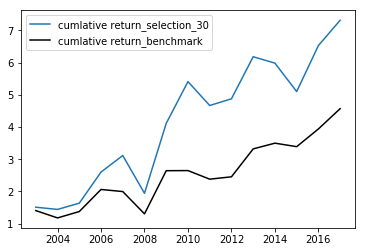

In [145]:
import matplotlib.pyplot as plt
plt.plot(ret_porf_bench_df['cumlative return_selection'],label='cumlative return_selection_%d'%n_sel)
plt.plot(ret_porf_bench_df['cumlative return_benchmark'],'black',label='cumlative return_benchmark')
plt.legend()
